# "Markov Zincirlerine kisa bir giris" icin gorseller

## Umit Islak
## Arda Akdemir

In [1]:
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
#import pygraphviz
import pyparsing
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from IPython.display import Math,Image

/home/arda/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/arda/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edges_from([(0,1), (0,2), (1,1), (1,2)])
edge_labels={("0","1"):6}

In [3]:
p=product(range(10),range(5))
import pygraphviz as pgv

In [4]:
from graphviz import Digraph
g = Digraph('G')
g.edge("1","1",label="0.5")
g.edge("1","2",label="0.5")
g.edge("2","1",label="0.3")
g.edge("2","2",label="0.7")
g.edge("3","2",label="0.1")
g.edge("3","3",label="0.1")
g.edge("3","4",label="0.8")
g.edge("4","3",label="0.8")
g.edge("4","4",label="0.2")
g.view()


'G.gv.pdf'

In [5]:
plt.savefig("ilkfig.png")

<Figure size 432x288 with 0 Axes>

**2 durumlu Markov zinciri ** 

 bolum 4 sayfa 11

In [6]:
p=0.2
q=0.4
x=0 ## initial distribution
X0=np.array([x,1-x])
P=np.array([[1-p,p],[q,1-q]])
X0s=[X0]
for x in range(10):
    X0=np.matmul(X0,P)
    X0s.append(X0)
X0s

[array([0, 1]),
 array([0.4, 0.6]),
 array([0.56, 0.44]),
 array([0.624, 0.376]),
 array([0.6496, 0.3504]),
 array([0.65984, 0.34016]),
 array([0.663936, 0.336064]),
 array([0.6655744, 0.3344256]),
 array([0.66622976, 0.33377024]),
 array([0.6664919, 0.3335081]),
 array([0.66659676, 0.33340324])]

sayfa 12  Markov Chains Mixing Times ornegi

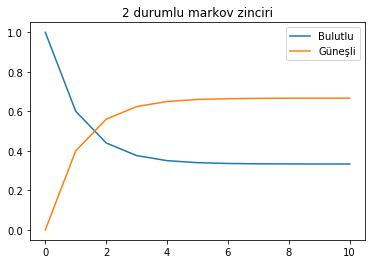

Guneşli beklenen: 0.666667
Bulutlu beklenen: 0.333333


In [7]:
## sayfa 12
G=[x[0] for x in X0s]
B=[x[1] for x in X0s]
plt.title("2 durumlu markov zinciri")
plt.plot(range(len(B)),B,label="Bulutlu")
plt.plot(range(len(B)),G,label="Güneşli")
plt.legend()
plt.savefig("gunyagolasiliklar")
plt.show()
print("Guneşli beklenen: %f" %(q/(q+p) ))
print("Bulutlu beklenen: %f" %(p/(p+q)))

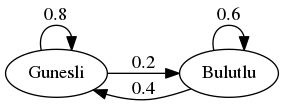

In [8]:
from networkx.drawing.nx_agraph import write_dot
B=nx.DiGraph(rankdir="LR")
states=["Gunesli","Bulutlu"]
pos={}
pos["Gunesli"]=(0,0)
pos["Bulutlu"]=(1,1)
B.add_nodes_from(states)
B.add_edge(states[0],states[0],label=1-p)
B.add_edge(states[0],states[1],label=p)
B.add_edge(states[1],states[0],label=q)
B.add_edge(states[1],states[1],label=1-q)
edge_labs={}
#nx.draw(B)
#nx.draw_networkx_nodes(B,pos,alpha=0)
#nx.draw_networkx_edges(B,pos,width=0.1)
#nx.draw_networkx_edge_labels(B,pos,edge_labels=nx.get_edge_attributes(B,"label"))
#plt.axis('off')
write_dot(B,"gunesbulut.dot") #dot -Tpng graph.dot -o a.png
! dot -Tpng gunesbulut.dot -o gunbul.png
Image("gunbul.png")

In [9]:
## Gecis matrisinden gecis semasi olusturma
## names statelerin isimleri
## P gecis olasiliklari
def transitiongraph(names,P):
    B=nx.DiGraph(rankdir="LR")
    B.add_nodes_from(names)
    for i,j in product(range(len(P)),range(len(P))):
        if P[i][j]!=0:
            B.add_edge(names[i],names[j],label=P[i][j])
    return B

In [10]:
## Gecis matrisinden gecis semasi olusturma
## names statelerin isimleri
## P gecis olasiliklari
def transitiongraph2(names,P):
    B=nx.DiGraph(rankdir="LR")
    B.add_nodes_from(names)
    for i,j in product(range(len(P)),range(len(P))):
        if P[i][j]!=0:
            B.add_edge(names[i],names[j])
    return B

In [11]:
def transitiongraph3(names,P):
    B=nx.Graph(rankdir="LR")
    B.add_nodes_from(names)
    for i,j in product(range(len(P)),range(len(P))):
        if P[i][j]!=0:
            B.add_edge(names[i],names[j])
    return B

In [12]:
def drawgraph(B,dotfilename,pos1):
    pos=pos1
    plt.figure(figsize=(10,5))
    plt.axis('off')
    nx.draw_networkx(B,pos=pos,alpha=1)
    nx.draw_networkx_edges(B,pos=pos)
    nx.draw_networkx_edge_labels(B,pos=pos,edge_labels=nx.get_edge_attributes(B,"label"))
    write_dot(B,dotfilename)

In [13]:
def drawgraph2(B,dotfilename,pos1):
    pos=pos1
    plt.figure(figsize=(10,5))
    plt.axis('off')
    nx.draw_networkx(B,pos=pos,alpha=1)
    nx.draw_networkx_edges(B,pos=pos)
    #nx.draw_networkx_edge_labels(B,pos=pos,edge_labels=nx.get_edge_attributes(B,"label"))
    write_dot(B,dotfilename)

In [14]:
import random
def randomn(n):
    list1=[]
    for x in range(n):
        list1.append(random.random())
    tot=sum(list1)
    for x in range(n):
        list1[x]/=tot
    return list1

### Mutasyon ornegi

bolum 7 sayfa 16 

In [15]:
k=2
beta=0.1
P=np.ones((k,k))
X_0=np.array(randomn(k))
X_0s=[X_0]
for i,j in product(range(k),range(k)):
    if i==j:
        P[i][j]=1-beta
    else:
        P[i][j]=beta/(k-1)

In [16]:
for x in range(200):
    X_0=np.matmul(X_0,P)
    X_0s.append(X_0)

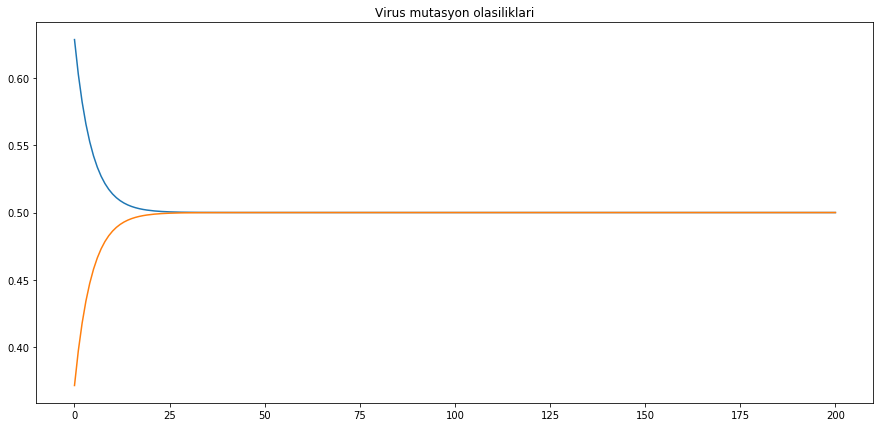

array([0.50000183, 0.49999817])

In [17]:
plt.figure(figsize=(15,7))
for x in range(len(X_0s[0])):
    xs=[time[x] for time in X_0s]
    plt.plot(range(len(xs)),xs)
plt.title("Virus mutasyon olasiliklari")
plt.show()
X_0s[50]

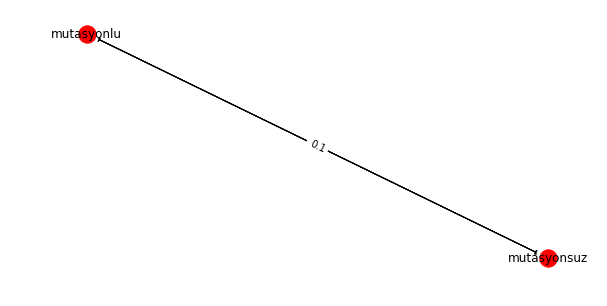

In [18]:
names=["mutasyonlu","mutasyonsuz"]
Mut=transitiongraph(names,P)
pos1=nx.spring_layout(Mut)
drawgraph(Mut,"mut.dot",pos1)
! dot -Tpng mut.dot -o mut.png

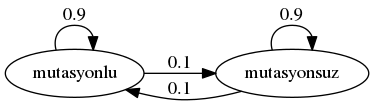

In [19]:
Image("mut.png")

In [20]:
P=[]

### Indirgenme Gecis Matrisi

bolum 8 sayfa 18

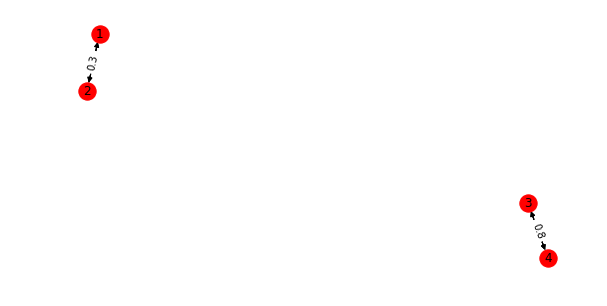

In [21]:
names=[1,2,3,4]
P=[[0.5,0.5,0,0],[0.3,0.7,0,0],[0,0,0.2,0.8],[0,0,0.8,0.2]]
B=transitiongraph(names,P)
pos1=nx.spring_layout(B)
drawgraph(B,"indir.dot",pos1)

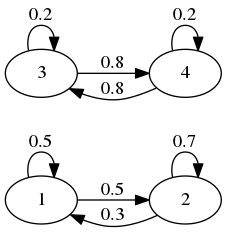

In [22]:
! dot -Tpng indir.dot -o indir.png
Image("indir.png")

### Ehrenfest

bolum 9 sayfa 21

In [23]:
n=5
names=[x for x in range(n+1)]
P=[]##transition matrix
for x in range(n+1):
    p=[0 for x in range(n+1)]
    p[max(0,x-1)]=float(x)/n
    p[min(n,x+1)]=float(n-x)/n
    P.append(p)

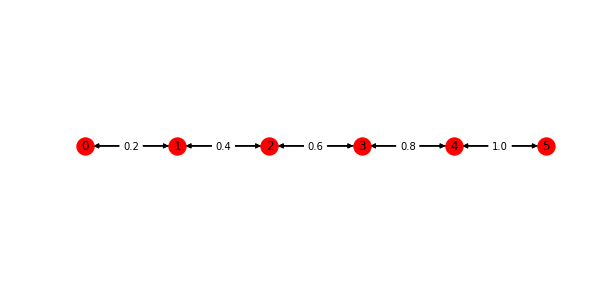

In [24]:

B=transitiongraph(names,P)
pos={}
for name in names:
    pos[name]=(name,3)
drawgraph(B,"ehren.dot",pos)
! dot -Tpng ehren.dot -o ehren2.png

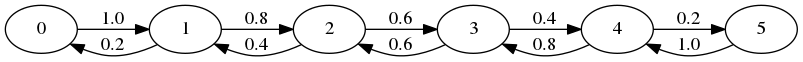

In [25]:
Image("ehren2.png")

### Bakalim dogru mu??

Kagit ustunde teorik olarak buldugumuz verilerin dogru olup olmadigindan daha emin olmak icin bilgisayar simulasyonlarindan faydalanabiliriz. Deneyi defalarca tekrarladigimizda elde ettigimiz degerin (empirik deger) teorik degere yakin olmasini bekliyoruz.

#### Teorik degerler 

In [26]:
def factorial(n):
    if n==0 or n==1:
        return 1
    else:
        return n * factorial(n-1)

In [27]:
def ninjlisi(n,j):
    nom=1.0
    for x in range(j):
        nom*=n-x
    den=factorial(j)
    return nom/den

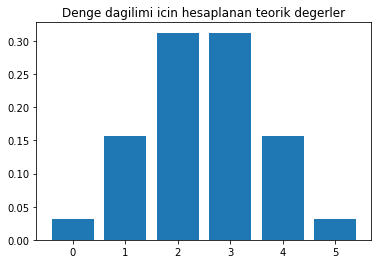

array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125])

In [28]:
teorikdegerler=np.ones(n+1)
for x in range(n+1):
    if x==0 or x==n:
        teorikdegerler[x]=1.0/(pow(2,n))
    else:
        teorikdegerler[x]=ninjlisi(n,x)*(1/pow(2,n))
plt.bar(range(n+1),teorikdegerler)
plt.title("Denge dagilimi icin hesaplanan teorik degerler")
plt.show()
teorikdegerler

In [29]:
start_number=0## baslangicta A cuvalindaki top sayisi
X_0=np.array([1 if x==start_number else 0 for x in range(n+1)])

In [30]:
def ind(list1):
    for x in range(len(list1)):
        if list1[x]==1:
            return x
    return -1

In [31]:
def ehrenfestsimul(basdurum,M):
    ilk=ind(basdurum)
    top_say= len(basdurum)-1
    counts=[0 for x in range(top_say+1)]
    counts[ilk]=1
    for x in range(M):
        rand1=np.random.random()
        if ilk==top_say:
            ilk-=1
        elif ilk==0:
            ilk+=1
        else:
            a=1.0
            a*=(top_say-ilk)
            a/=top_say
            if rand1 < a:
                ilk+=1
            else:
                ilk-=1
        counts[ilk]+=1
    return counts

[320, 1581, 3154, 3112, 1527, 307]
[ 312.5 1562.5 3125.  3125.  1562.5  312.5]


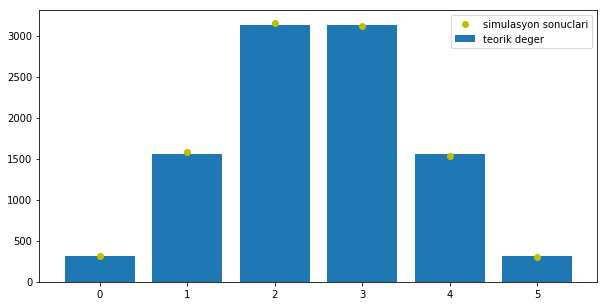

In [32]:
M=10000 # M defa cuvallardan rasgele top cekicez ve A cuvalinda j top olma durumlarini sayicaz
empirik=ehrenfestsimul(X_0,M)
teorikdeger=teorikdegerler*M
print(empirik)
print(teorikdeger)
x=[i for i in range(n+1)]
plt.figure(figsize=(10,5))
plt.bar(x,teorikdeger,label='teorik deger')
plt.plot(x,empirik ,"ro",label='simulasyon sonuclari',color='y')
plt.legend()
plt.savefig("ehrensimul")
plt.show()

### Kumarbazin Sonu
sayfa 23

Degisik degerler icin olasilik tablosu.

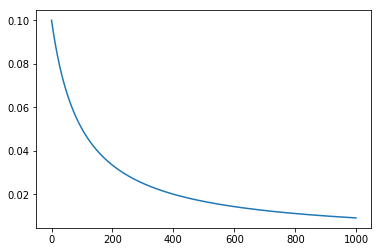

In [191]:
N=100
x1=10
P=[x1/(x+N) for x in range(1000)]
plt.plot(P)
plt.show()

In [192]:
pvals=np.linspace(0.1,0.9,200)
qvals=[1-p for p in pvals]

In [193]:
Pi=[(1-(qvals[i]/pvals[i])**x1)/(1-(qvals[i]/pvals[i])**N) for i in range (len(pvals))]

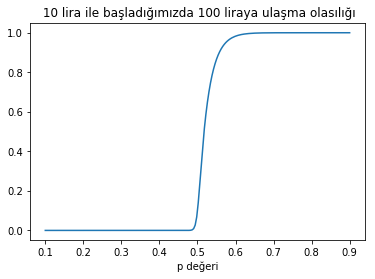

In [196]:
plt.plot(pvals,Pi)
plt.title(" %d lira ile başladığımızda %d liraya ulaşma olasılığı"%(x1,N))
plt.xlabel("p değeri")
plt.savefig("kumarN.png")
plt.show();

In [37]:
d=100
[Pi[d],pvals[d]]

[0.1398343516803598, 0.5020100502512563]

### Polya Urn Modeli 
   bolum 13 sayfa 30

In [38]:
T=3
P=np.zeros((T+2,T+2))
for i in range(T+1):
    P[i][i+1]=float(i+1)/(T+2)
    P[i][i]=(T+2-float(i+1))/(T+2)

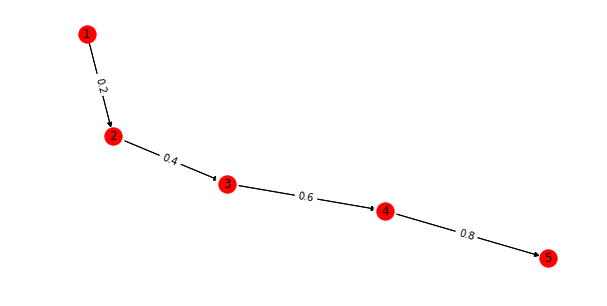

In [39]:
names=[x+1 for x in range(T+2)]
PolG=transitiongraph(names,P)
pos=nx.spring_layout(PolG)
drawgraph(PolG,"Polya.dot",pos)
! dot -Tpng Polya.dot -o Polya.png

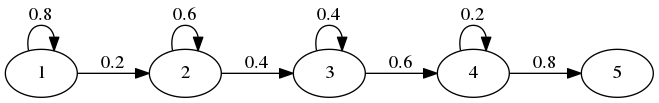

In [40]:
Image("Polya.png")

In [41]:
## bakalim gercekten de polya cuval modelinde X_t aninda herhangi bir durumda olma olasiligimiz esit mi?

In [42]:
## rastgele 1 index secelim
## bu indisteki top ile ayni renkte N adet topu cuvala ekleyelim
def drawandput(polyaurn,N):
    yenicuval=[x for x in polyaurn]
    rand1=int(random.random()*len(polyaurn))
    for i in range(N):
        yenicuval.append(polyaurn[rand1])
    return yenicuval

In [43]:
## t aninda cuvaldaki siyah top sayisi
def X_t(cuval,t):
    return cuval[:t+2].count("s")

In [44]:
##  nAdim sonra 
def polysimul(cuval,nAdim):
    cuval1=cuval
    for i in range(nAdim):
        cuval1=drawandput(cuval1,1)
    return cuval1

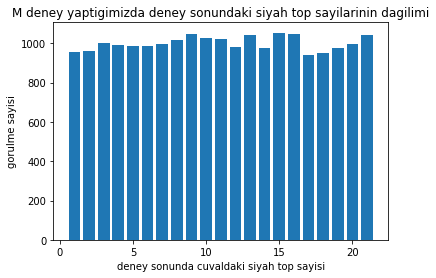

In [45]:
##simulasyonu N adim icin M kez tekrarladigimizda tekduze dagilima yakin bir dagilim bekliyoruz
M=21000
N=20
siyahsayisi=[]
for i in range(M):
    cuval=["s","b"]
    c1=polysimul(cuval,N)
    siyahsayisi.append(c1.count("s"))
siyahtoplams=[]## her olayin gorulme sayilarini iceren array
for i in range(1,N+2):
    siyahtoplams.append(siyahsayisi.count(i))
b=plt.bar(range(1,N+2),siyahtoplams)
plt.xlabel('deney sonunda cuvaldaki siyah top sayisi')
plt.ylabel('gorulme sayisi')
plt.title("M deney yaptigimizda deney sonundaki siyah top sayilarinin dagilimi")
a=plt.savefig("polyasimul")
plt.plot();

### 3-D Rasgele Yuruyus

bolum 14 sayfa 31

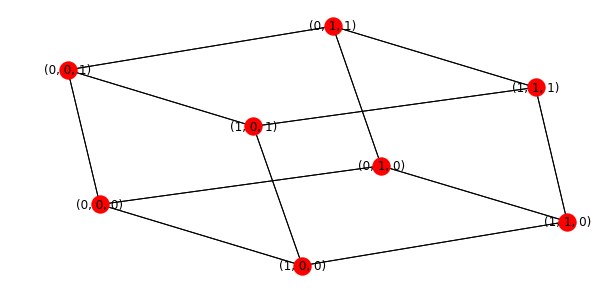

In [46]:
H=nx.hypercube_graph(3)
pos=nx.spring_layout(H)
drawgraph(H,"hyper1.dot",pos)
! dot -Tpng hyper1.dot -o hyper1.png
plt.savefig("hypernet")

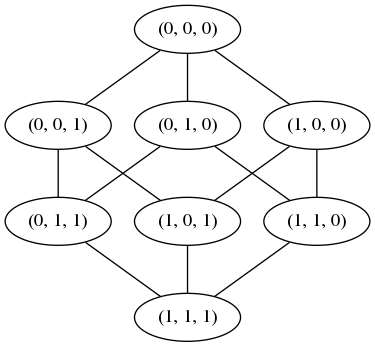

In [47]:
Image("hyper1.png")

In [48]:
def generatecube():
    init=[0,0,0]
    list1=[init]
    inds=[]
    used=[]
    c=1
    ind1=0
    for x in list1:
        if x not in used:
            for j in range(len(x)):
                pnew=[i for i in x]
                pnew[j]=1
                if pnew!=x:
                    list1.append(pnew)
                    inds.append(ind1)
            used.append(x)
        ind1+=1
    return list1,inds

In [49]:
def edges(list1,inds):
    edgel=[]
    for i in range(0,len(inds)):
        edgel.append((list1[inds[i]],list1[i+1]))
    return edgel

In [50]:
list1,inds=generatecube()
edgel=edges(list1,inds)

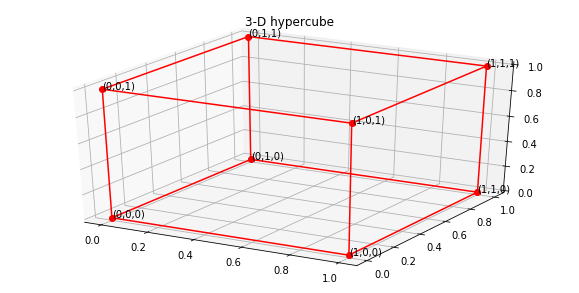

In [51]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
x=[0,0,0,0,1,1,1,1]
y=[0,0,1,1,0,0,1,1]
z=[0,1,0,1,0,1,0,1]
ax.plot(x,y,z,'ro')
for i in range(len(x)):
    label="(%d,%d,%d)" %(x[i],y[i],z[i])
    ax.text(x[i],y[i],z[i],label)
for edge in edgel:
    ax.plot([edge[0][0],edge[1][0]],[edge[0][1],edge[1][1]],[edge[0][2],edge[1][2]],color="r")
plt.title("3-D hypercube")
plt.savefig("3dhypercube")
plt.show()


### Kupon Toplama Problemi

bolum 15 sayfa 31

In [52]:
##basitlestirmek icin her kuponun cikma olasiligini 1/M aliyoruz
M=4
K=np.zeros((M+1,M+1))
for i in range(M):
    K[i][i]=float(i)/M
    K[i][i+1]=(M-float(i))/M

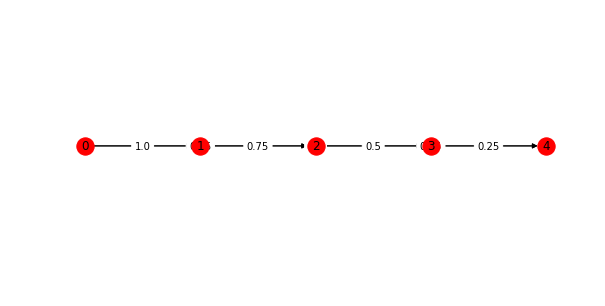

In [53]:
names=[i for i in range(M+1)]
KG=transitiongraph(names,K)
pos={}
for name in names:
    pos[name]=(name,3)
drawgraph(KG,"kupon.dot",pos)
! dot -Tpng kupon.dot -o kupon2.png

			Kupon toplama problemi 4 kupon icin gecis grafigi


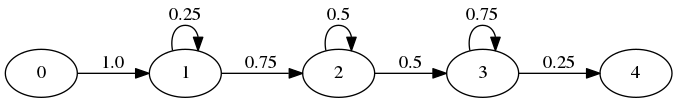

In [54]:
print("\t\t\tKupon toplama problemi %d kupon icin gecis grafigi" %M)
Image("kupon2.png")

### Kupon Toplama icin Beklenen surenin deneysel hesabi

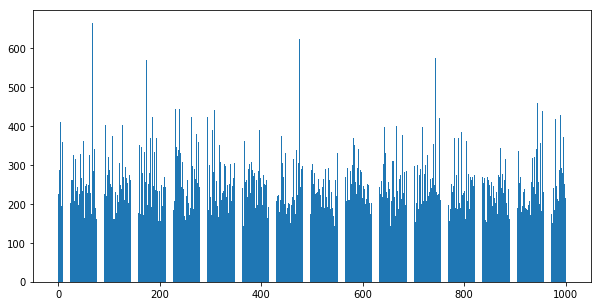

In [55]:
## her kuponun cekilme olasiligini esit aliyoruz yani 1/M2
M2=55
N=1000
iters=[]
mykupons=[]
for i in range(N):
    iter1=0
    mykupon=[0 for i in range(M2)]    
    while 0 in mykupon:
        ind1=np.random.randint(0,M2)
        mykupon[ind1]+=1
        iter1+=1
    iters.append(iter1)
    mykupons.append(mykupon)
plt.figure(figsize=(10,5))
plt.bar(range(1,N+1),iters)
plt.show()

In [56]:
sum(iters)/(N)

257.206

In [57]:
##teorik deger hata mi var?
M2*(math.log(M2)+0.577216)

252.1502051877859

In [58]:
maxval=0
for myk in mykupons:
    max1=max(myk)
    if max1>maxval:
        maxval=max1

## PageRank
14.1 sayfa 31

In [59]:
## kod lazim mi?


## Z uzerinde rasgele yuruyus
sayfa 37 bolum 20

In [60]:
M=9
p=0.5
q=round(1-p,2)
names=["...."]
for i in range(M-2):
    names.append(int(i-(M-3)/2))
names.append("...")
P=np.zeros((len(names),len(names)))
P[0][1]=p
P[len(names)-1,len(names)-2]=q
for i in range(1,len(names)-1):
    P[i][i+1]=p
    P[i][i-1]=q

In [61]:
RW=transitiongraph(names,P)
pos1=nx.spring_layout(RW)

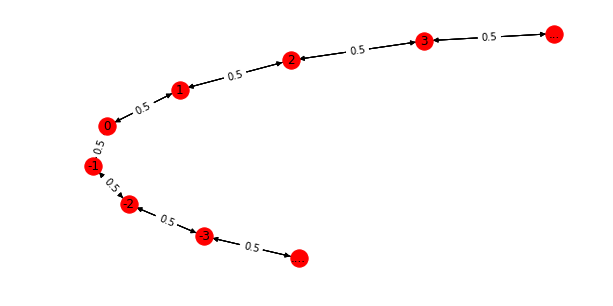

In [62]:
drawgraph(RW,"randomZ.dot",pos1)

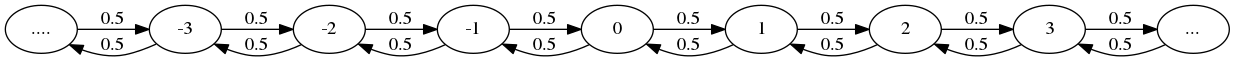

In [63]:
! dot -Tpng randomZ.dot -o randomZ.png
Image("randomZ.png")

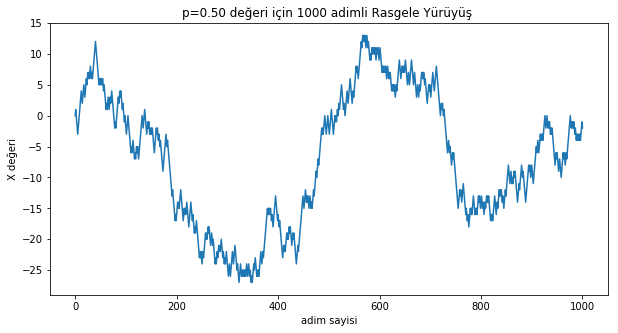

In [64]:
## random walk simulasyonu
M= 1000 ##adim sayisi
X=[0] ## initial value
for i in range(M):
    rand1=np.random.uniform(0,1)
    if rand1< p:
        X.append(X[-1]+1)
    else:
        X.append(X[-1]-1)
plt.figure(figsize=(10,5))
plt.plot(X)
plt.title("p=%0.2f değeri için %d adimli Rasgele Yürüyüş "%(round(p,2),M))
plt.xlabel("adim sayisi")
plt.ylabel('X değeri')
plt.savefig("1dras.png")
plt.show()

### 2-D Rasgele Yuruyus
bolum 22 sayfa 40

In [65]:
N= 10 ## adim sayisi
p=0.5
q=round(1-p,2)
X=[0]
Y=[0]
Z=[x for x in range(N+1)]
for i in range(N):
    rand1=np.random.uniform(0,1,size=2)
    if rand1[0]<p:
        X.append(X[-1]+1)
    else:
        X.append(X[-1]-1)
    if rand1[1]<p:
        Y.append(Y[-1]+1)
    else:
        Y.append(Y[-1]-1)

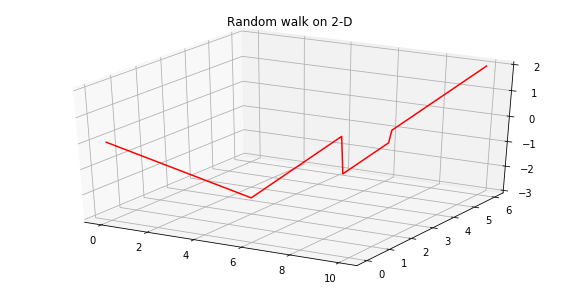

In [66]:
## Bunu nasil gorsellestirebiliriz
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(Z,X,Y,color="r")
plt.title("Random walk on 2-D")
plt.savefig("randomwalk2d")
plt.show()

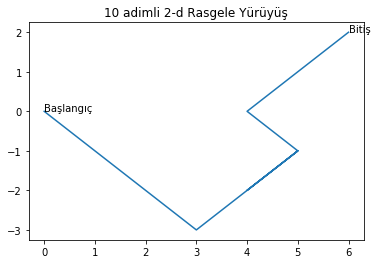

In [67]:
plt.text(0,0,s="Başlangıç")
plt.text(X[-1],Y[-1],s="Bitiş")
plt.plot(X,Y)
plt.title("%d adimli 2-d Rasgele Yürüyüş"%N)
plt.savefig("2dras.png")
plt.show()

### Dogum ve Olum Zinciri


In [200]:
p=0.5
q=0.3
r=round(1-p-q,2)
n=8
names=[i for i in range(n)]
P=np.zeros((10,10))
P[0][0]=r+q
P[0][1]=p
for i in range(1,n-1):
    P[i][i-1]=q
    P[i][i+1]=p
    P[i][i]=r
P[n-1][n-1]=r+p
P[n-1][n-2]=q

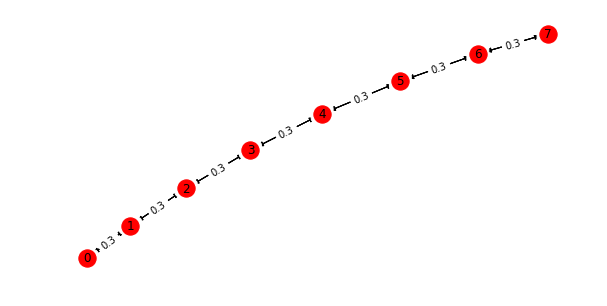

In [201]:
BD=transitiongraph(names,P)
pos1=nx.spring_layout(BD)
drawgraph(BD,"birthdeath.dot",pos1)

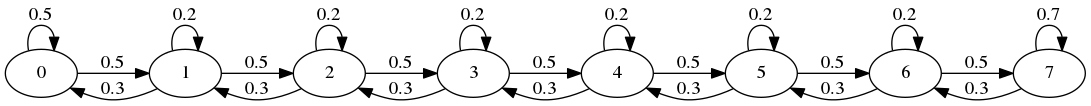

In [202]:
! dot -Tpng birthdeath.dot -o birthdeath.png
Image("birthdeath.png")

In [203]:
X=[]

### Monopoly Simulasyonu
bolum 18

Burada yapacagimiz sadece kodes kutularinin oldugu basitlestirilmis Monopoly tahtasi uzerindeki denge dagilimini bulmak. Bunun icin P matrisini tanimlayip yakinsadigi dagilimi bulacagiz.

In [72]:
##2 dice prob
def dice2prob(n):
    return min(n-2,12-n)+1.0

In [73]:
##transition matrix for Monopoly game
size=40
P=np.zeros((size,size))
for i in range(size):
    for j in range(i+1,i+13):
        P[i][j%40]=dice2prob(j-i)/36
P[35]

array([0.11111111, 0.13888889, 0.16666667, 0.13888889, 0.11111111,
       0.08333333, 0.05555556, 0.02777778, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02777778, 0.05555556, 0.08333333])

In [74]:
init1=[0 for i in range(size)]
init1[0]=1
N=100
inits=[init1]
for i in range(N):
    init1=np.matmul(init1,P)
    inits.append(init1)
init1

array([0.02496457, 0.024965  , 0.0249663 , 0.02496843, 0.02497133,
       0.02497494, 0.02497917, 0.02498391, 0.02498905, 0.02499446,
       0.025     , 0.02500554, 0.02501095, 0.02501609, 0.02502083,
       0.02502506, 0.02502867, 0.02503157, 0.0250337 , 0.025035  ,
       0.02503543, 0.025035  , 0.0250337 , 0.02503157, 0.02502867,
       0.02502506, 0.02502083, 0.02501609, 0.02501095, 0.02500554,
       0.025     , 0.02499446, 0.02498905, 0.02498391, 0.02497917,
       0.02497494, 0.02497133, 0.02496843, 0.0249663 , 0.024965  ])

Baslangic noktasindan baslayarak 100 iterasyon sonra  duzgun dagilim elde ettik. 

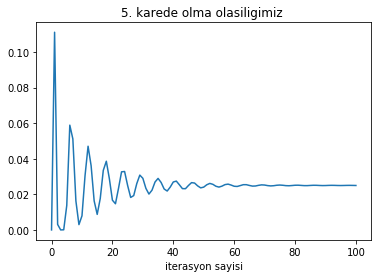

In [75]:
kare=5
plt.plot([init[kare] for init in inits])
plt.title("%d. karede olma olasiligimiz " %kare);
plt.xlabel("iterasyon sayisi");

Simdi de kodes kutularini hesaba katalim. Bunun icin 30 numarali kutuya giden olasiliklarin hepsini 10 numarali kutuya aktarmamiz yeterli.

### Kodesli Versiyon

In [76]:
PKodes=np.zeros((size,size))
for i,j in product(range(size),range(size)):
    if j==30:
        PKodes[i][10]+=P[i][j]
    else:
        PKodes[i][j]=P[i][j]
PKodes[20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02777778, 0.05555556, 0.08333333,
       0.11111111, 0.13888889, 0.16666667, 0.13888889, 0.11111111,
       0.        , 0.05555556, 0.02777778, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [77]:
##Kodesli simulasyon
init1=[0 for i in range(size)]
init1[0]=1
N=100
inits=[init1]
for i in range(N):
    init1=np.matmul(init1,PKodes)
    inits.append(init1)
init1

array([0.02293944, 0.0231179 , 0.02331294, 0.02357172, 0.02320021,
       0.02300556, 0.02293431, 0.02294521, 0.02300402, 0.02307899,
       0.05      , 0.02313804, 0.02386288, 0.0245838 , 0.02533064,
       0.0261278 , 0.02699816, 0.02796689, 0.02755225, 0.02726806,
       0.02706056, 0.0268821 , 0.02668706, 0.02642828, 0.02679979,
       0.02699444, 0.02706569, 0.02705479, 0.02699598, 0.02692101,
       0.        , 0.02686196, 0.02613712, 0.0254162 , 0.02466936,
       0.0238722 , 0.02300184, 0.02203311, 0.02244775, 0.02273194])

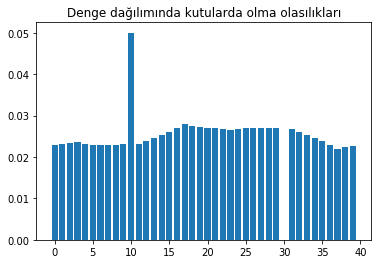

In [78]:
plt.bar([i for i in range(size)],init1)
plt.title("Denge dağılımında kutularda olma olasılıkları")
plt.savefig('dengeprob')
plt.show()

Using Board Games and Mathematica® 
to Teach the Fundamentals of  
Finite Stationary Markov Chains  makalesi ile birebir ayni degerleri elde ettik.

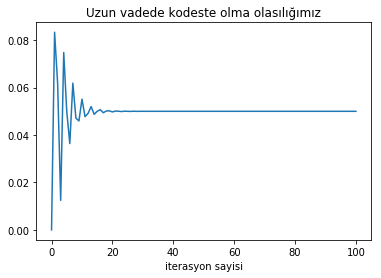

In [79]:
kare=10
plt.plot([init[kare] for init in inits])
plt.title("Uzun vadede kodeste olma olasılığımız");
plt.xlabel("iterasyon sayisi");
plt.savefig("kadesprob.png")
plt.show()

### Monte Carlo Methodu

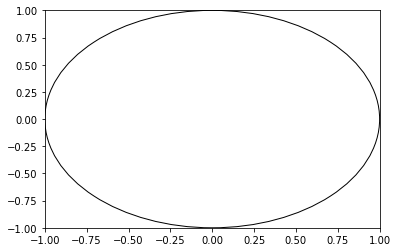

In [80]:
circle1=plt.Circle((0,0),1,fill=False)
fig ,ax =plt.subplots()
ax.add_artist(circle1)
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))
plt.savefig("cirsqu");
plt.show();

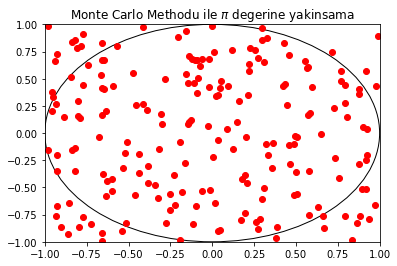

In [81]:
M=200#number of dots
dots=[]
for i in range(M):
    rand1=(np.random.uniform(-1,1),np.random.uniform(-1,1))
    dots.append(rand1)
xs=[a[0] for a in dots]
ys=[a[1] for a in dots]
circle1=plt.Circle((0,0),1,fill=False)
fig ,ax =plt.subplots()
ax.add_artist(circle1)
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))
plt.title("Monte Carlo Methodu ile $\pi$ degerine yakinsama")
plt.plot(xs,ys,'ro');
plt.savefig("mccirsqu");
plt.show();

In [82]:
c=0.0
n=0
pival=[]
for dot in dots:
    if math.sqrt(pow(dot[0],2)+pow(dot[1],2))<1:
        c+=1
    n+=1
    pival.append(4*c/n)
print(4*(c/M))

3.2


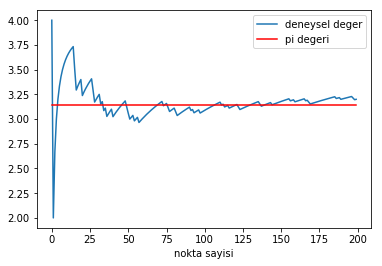

In [83]:
plt.plot(pival,label="deneysel deger")
plt.plot(range(M),[3.1415 for i in range(M)],c="r",label="pi degeri")
plt.xlabel("nokta sayisi")
plt.legend();
plt.savefig("MCpival");
plt.show();

#### Integralin degerini hesaplama
sayfa 42

Diyelim ki elimizde bir $f(x)$ fonksiyonu var ve amacimiz $\int_a^b f(x)$ degerini hesaplamak. $M=max_{x\epsilon[a,b]}f(x)$ bilinirse yukardakine benzer bir yontem kullanarak aradigimiz integralin degerini bulabiliriz.

Ornegimizde $f(x)=x-x^2$ ve $M=1$

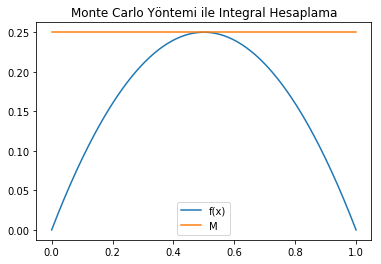

In [133]:
a=0
b=1
x=np.linspace(a,b,200)
y=[i-pow(i,2) for i in x]
M=max(y)
fig, ax = plt.subplots();
ax.plot(x, y,label="f(x)");
ax.plot(x,[M for i in x],label="M");
plt.title("Monte Carlo Yöntemi ile Integral Hesaplama")
fig.savefig('mcintini.png')
ax.legend();

In [134]:
def f(x):
    return x-pow(x,2)

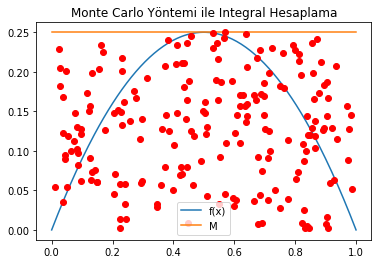

In [135]:
N=200
c=0
cs=[]
dots=[]
for i in range(N):
    x1=np.random.uniform(a,b)
    y1=np.random.uniform(0,M)
    if y1<= f(x1):
        c+=1
    cs.append(c)
    dots.append((x1,y1))
ax.plot([dot[0]for dot in dots ],[dot[1] for dot in dots],"ro");
fig.savefig("mcinteg")
fig

In [136]:
M*(b-a)*c/N

0.1674957703088306

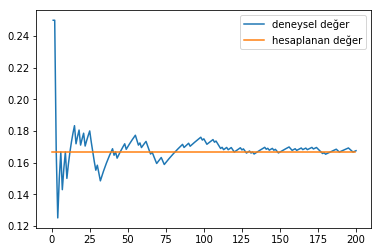

In [137]:
norcs=[M*(b-a)*cs[i]/(i+1) for i in range(len(cs))]
plt.plot([i for i in range(1,len(cs)+1)],norcs, label="deneysel değer")
plt.plot(range(len(cs)),[1.0/6 for i in range(len(cs))],label="hesaplanan değer")
plt.legend()
plt.savefig("mcintval.png")
plt.show();

Bu ornegimiz icin $\int_0^1 (x-x^2)dx$ kolayca hesaplanabilir. 

$$
\dfrac{x^2}{2}-\dfrac{x^3}{3} = \dfrac{1}{6}
$$

## Markov Zinciri Monte Carlo Metodu
Olle Hagstrom Finite Markov Chains and Algorithmic Applications Chapter 7

**Example 7.1 The hard-core model.** 

Let G = (V, E) be a graph with vertex set $V = \{v_1 , . . . , v_k \}$ and edge set $E = \{e_1 , . . . , e_l \}$. In the so-called hard-core model on G, we randomly assign the value 0 or 1 to each of the vertices, in such a way that no two adjacent vertices (i.e., no two vertices that share an edge) both take the value 1. Assignments of 0’s and 1’s to the vertices are called **configurations**, and can be thought of as elements of the set $\{0, 1\}^V$ . Configurations in which no two 1’s occupy adjacent vertices are called **feasible**. The precise way in which we pick a random configuration is to take each of the feasible configurations with equal probability. We write $\mu_G$ for the resulting probability measure on $\{0, 1\}^V$ . Hence, for $ξ ∈ \{0, 1\}^V$  , we have
$$
\mu_G(ξ)=
\begin{cases}
\dfrac{1}{Z_G} \text{ , if }  ξ \text{ is feasible}\\
0 \text{ ,    otherwise}\\
\end{cases}
$$

Let G be a $8x8$ grid shown below.

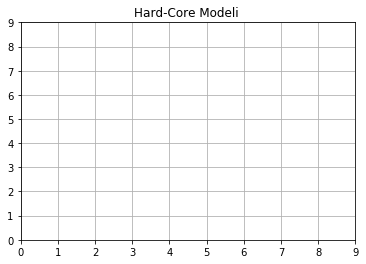

In [164]:
fig,ax = plt.subplots();
ax.set_xticks(np.arange(0, 10, 1));
ax.set_yticks(np.arange(0, 10, 1));
plt.title("Hard-Core Modeli ")
ax.grid();

In [165]:
def neighbors(x,y):
    return [(x+1,y),(x-1,y),(x,y+1),(x,y-1)]

In [166]:
##returns a randomly generated feasible configuration with success probability p
## for high values of p the hard-core model will be denser
def inithardcore(size,p):
    config=np.zeros((size,size))
    for i, j in product(range(size),range(size)):
        neighs=neighbors(i,j)
        appn=[neigh for neigh in neighs if neigh[0] in range(size) and neigh[1] in range(size)]
        if all (config[neigh[0]][neigh[1]]==0 for neigh in appn) and np.random.uniform(0,1)<p:
            config[i][j]=1
        else:
            config[i][j]=0
    return config

In [167]:
size=8
p=0.5
init1=inithardcore(size,p)
print(init1)

[[0. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0.]]


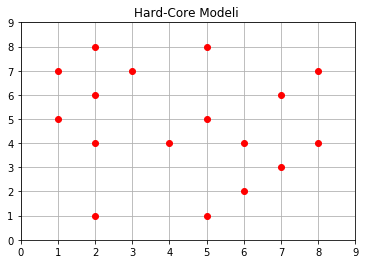

In [168]:
ones=[(i,j) for i,j in product(range(size),range(size)) if init1[i][j]==1]
xones=[x[0]+1 for x in ones]
yones=[x[1]+1 for x in ones]
ax.plot(xones,yones,"ro");
ax.set_xticks(np.arange(0, 10, 1));
ax.set_yticks(np.arange(0, 10, 1));
fig.savefig("hardcoreinit.png")
fig

MCMC metodunu kullanarak hard-core modeline uygun konfigürasyonlardaki noktaların sayısının beklenen değerini hesaplayacağız. Yukarıda tanımladığımız denge dağılımına sahip Markov zincirinin geçiş matrisini tanımlayıp uzun süre zinciri çalıştırırsak beklenen değere yakınsayacağız. 

Geçiş ilişkilerini şu şekilde tanımlıyoruz:

1. Rasgele düzgün dağılımdan bir tane köşe seçiyoruz.

2. Bir para atıyoruz.

3. Yazı gelirse ve seçtiğimiz köşenin bütün komşuları 0 ise köşemizi 1 yapıyoruz. Değilse 0'a eşitliyoruz.

4. Seçtiğimiz köşe dışındakileri değiştirmiyoruz.

Bu yöntemle zincirimizi yeterli süre çalıştırırsak beklenen değere yaklaşacağız.


In [144]:
N=10000#adim sayisi
size1=len(init1)
count1s=[]
for i in range(N):
    dot=np.random.randint(0,size1,2)# pick a vertex uniformly randomly
    rand1=np.random.random()## flip a coin
    neighs=neighbors(dot[0],dot[1])
    appn=[neigh for neigh in neighs if neigh[0] in range(size) and neigh[1] in range(size)]##neighbors
    if all (init1[neigh[0]][neigh[1]]==0 for neigh in appn) and rand1<=0.5:
        init1[dot[0]][dot[1]]=1
    else:
        init1[dot[0]][dot[1]]=0
    count1s.append(sum(sum(init1)))

In [145]:
sum(count1s)/N

14.8893

In [146]:
sums=[]
for i in range(1,N):
    sums.append(sum(count1s[:i])/i)

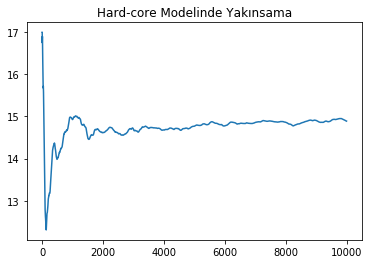

In [147]:
plt.plot(range(1,N),sums)
plt.title("Hard-core Modelinde Yakınsama")
plt.savefig("hardcoreyak.png")
plt.show()

### Independent Sets on Random Graphs

Rasgele bir graf ile başlıyoruz. Bu grafikteki bağımsız setlerin toplam sayısını bulmaya çalışacağız.

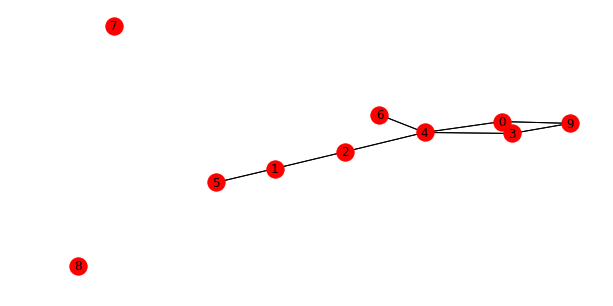

In [97]:
NV=10
p=0.25
P=np.zeros((NV,NV))##has the edges initially 
names=[i for i in range(NV)]
for i in range(NV):
    for j in range(i+1,NV):
        rand1=np.random.uniform()
        if rand1<p:
            P[i][j]=1
G=transitiongraph3(names,P)
drawgraph2(G,"indsetgraph1",nx.spring_layout(G))

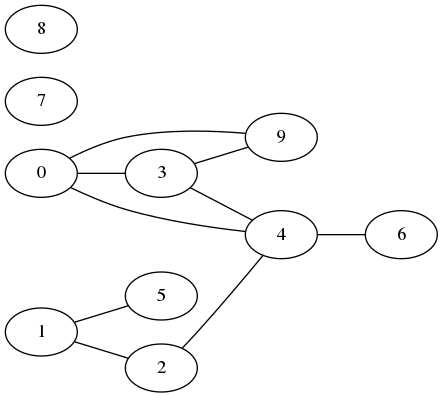

In [98]:
! dot -Tpng indsetgraph1 -o indsetgraph1.png
Image('indsetgraph1.png')

In [99]:
init=[0]
def 

SyntaxError: invalid syntax (<ipython-input-99-8a0d39239a1d>, line 2)